In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## LOAD : SOLAR POWER PLANT DATA

In [4]:
powerdata = pd.read_csv('Plant_1_Generation_Data.csv')


In [5]:
powerdata.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 0.00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 0.00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 0.00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 0.00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 0.00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [6]:
powerdata.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68773,17-06-2020 23.45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23.45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23.45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23.45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0
68777,17-06-2020 23.45,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0


### Adding Day and Month columns

In [7]:
powerdata['Month']= powerdata['DATE_TIME'].str[3:5]
powerdata['Day']= powerdata['DATE_TIME'].str[0:2]
powerdata['Month']= powerdata['Month'].astype('int32')
powerdata['Day']= powerdata['Day'].astype('int32')
#powerdata['Avg_Temperature']= (powerdata['AMBIENT_TEMPERATURE']+powerdata['MODULE_TEMPERATURE'])/2
powerdata

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Month,Day
0,15-05-2020 0.00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,5,15
1,15-05-2020 0.00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,5,15
2,15-05-2020 0.00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,5,15
3,15-05-2020 0.00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,5,15
4,15-05-2020 0.00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,5,15
...,...,...,...,...,...,...,...,...,...
68773,17-06-2020 23.45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,6,17
68774,17-06-2020 23.45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,6,17
68775,17-06-2020 23.45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,6,17
68776,17-06-2020 23.45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,6,17


### Using Groupby() to group according to Day

In [8]:
result = powerdata.groupby(['Day']).mean()
result

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Month
Day,,,,,,
1,4135001,2466.919523,241.331203,3024.615471,6.981186e+06,6.000000
2,4135001,3176.154636,310.664545,2981.198957,6.988686e+06,6.000000
3,4135001,3215.182076,314.473927,3666.657630,6.994436e+06,6.000000
4,4135001,3567.754122,348.818318,2968.519653,6.998047e+06,6.000000
5,4135001,3316.573958,324.314498,3069.291804,7.012397e+06,6.000000
6,4135001,2792.855020,273.066533,2474.082280,7.013243e+06,6.000000
7,4135001,3255.892122,318.247867,3668.138367,7.024930e+06,6.000000
8,4135001,3536.986299,345.685353,4027.107978,7.032935e+06,6.000000
9,4135001,3425.193605,334.866233,3911.125507,7.041132e+06,6.000000


Text(0, 0.5, 'Yield')

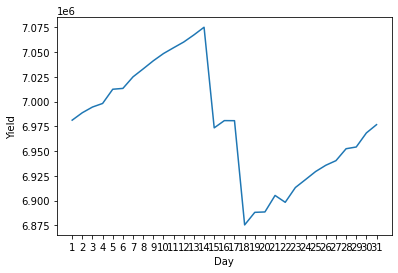

In [9]:
#plotting  day and Yield values

day = range(1,32)
plt.plot(day,result['TOTAL_YIELD'])
plt.xticks(day)
plt.xlabel('Day')
plt.ylabel('Yield')


In [10]:
result.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Month
count,31.0,31.000000,31.000000,31.000000,3.100000e+01,31.000000
mean,4135001.0,3214.204003,314.308740,3330.474654,6.976567e+06,5.501167
std,0.0,627.626435,61.229065,657.134332,5.769977e+04,0.483075
min,4135001.0,2278.668814,222.997021,2112.023726,6.875446e+06,5.000000
25%,4135001.0,2802.586529,274.183600,2956.800979,6.932512e+06,5.000000
50%,4135001.0,3176.154636,310.664545,3265.568322,6.980656e+06,5.519429
75%,4135001.0,3481.089952,340.275793,3850.519022,7.019087e+06,6.000000
max,4135001.0,4956.921159,484.460855,4844.519541,7.074979e+06,6.000000


## Loading Weather Data

In [11]:
weather_data= pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [12]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [13]:
weather_data.tail(10)
weather_data['Day'] = weather_data['DATE_TIME'].str[8:10]
weather_data['Time'] = weather_data['DATE_TIME'].str[10:]
weather_data['Day'] = weather_data['Day'].astype('int32')
weather_data['Temp'] = (weather_data['AMBIENT_TEMPERATURE'] + weather_data['MODULE_TEMPERATURE'])/2

weather_data.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Day,Time,Temp
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,15,00:00:00,24.020912
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,15,00:15:00,23.923128
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,15,00:30:00,23.764029
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,15,00:45:00,23.603491
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,15,01:00:00,23.393474
5,2020-05-15 01:15:00,4135001,HmiyD2TTLFNqkNe,24.536092,21.968571,0.0,15,01:15:00,23.252332
6,2020-05-15 01:30:00,4135001,HmiyD2TTLFNqkNe,24.638674,22.352926,0.0,15,01:30:00,23.495800
7,2020-05-15 01:45:00,4135001,HmiyD2TTLFNqkNe,24.873022,23.160919,0.0,15,01:45:00,24.016971
8,2020-05-15 02:00:00,4135001,HmiyD2TTLFNqkNe,24.936930,23.026113,0.0,15,02:00:00,23.981522
9,2020-05-15 02:15:00,4135001,HmiyD2TTLFNqkNe,25.012248,23.343229,0.0,15,02:15:00,24.177738


In [14]:
result2 = weather_data.groupby(['Day']).mean()
result2.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Temp
count,31.0,31.000000,31.000000,31.000000,31.000000
mean,4135001.0,25.533068,31.199994,0.232243,28.366531
std,0.0,1.087469,2.409299,0.043777,1.710634
min,4135001.0,23.850938,27.585834,0.159026,25.829106
25%,4135001.0,24.765991,29.434929,0.201871,27.090970
50%,4135001.0,25.338021,30.657138,0.228069,28.007858
75%,4135001.0,26.465245,32.449586,0.258812,29.565336
max,4135001.0,27.737575,37.186870,0.346414,32.462223


In [15]:
result2

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Temp
Day,,,,,
1,4135001,24.779514,28.961083,0.183846,26.870299
2,4135001,24.374920,29.448151,0.223788,26.911535
3,4135001,24.795672,29.998063,0.230818,27.396868
4,4135001,25.286176,31.221625,0.256989,28.253900
5,4135001,24.870622,30.582565,0.241590,27.726593
6,4135001,24.247355,28.802772,0.203405,26.525063
7,4135001,25.016090,31.497892,0.254191,28.256991
8,4135001,25.441268,31.621923,0.263703,28.531595
9,4135001,25.545736,31.515744,0.257861,28.530740


### ADDING MEAN VALUE OF TEMPERATURE AND IRRADIATION COLUMNS

In [16]:
result['Temperature'] = result2['Temp']
result['Irradiation'] = result2['IRRADIATION']


### CORRELATING DAY AND YIELD VALUES

In [17]:
all_data = result['TOTAL_YIELD']
all_data

Day
1     6.981186e+06
2     6.988686e+06
3     6.994436e+06
4     6.998047e+06
5     7.012397e+06
6     7.013243e+06
7     7.024930e+06
8     7.032935e+06
9     7.041132e+06
10    7.048422e+06
11    7.054322e+06
12    7.060090e+06
13    7.067253e+06
14    7.074979e+06
15    6.973420e+06
16    6.980732e+06
17    6.980656e+06
18    6.875446e+06
19    6.888140e+06
20    6.888533e+06
21    6.905199e+06
22    6.898265e+06
23    6.913181e+06
24    6.921214e+06
25    6.929363e+06
26    6.935661e+06
27    6.940299e+06
28    6.952355e+06
29    6.954100e+06
30    6.968307e+06
31    6.976650e+06
Name: TOTAL_YIELD, dtype: float64

In [18]:
power_base = pd.concat([all_data,all_data.shift(1)],axis=1)
power_base

,TOTAL_YIELD,TOTAL_YIELD
Day,,
1,6.981186e+06,NaN
2,6.988686e+06,6.981186e+06
3,6.994436e+06,6.988686e+06
4,6.998047e+06,6.994436e+06
5,7.012397e+06,6.998047e+06
6,7.013243e+06,7.012397e+06
7,7.024930e+06,7.013243e+06
8,7.032935e+06,7.024930e+06
9,7.041132e+06,7.032935e+06


In [19]:
power_base.dropna(inplace= True)

In [20]:
power_base

,TOTAL_YIELD,TOTAL_YIELD
Day,,
2,6.988686e+06,6.981186e+06
3,6.994436e+06,6.988686e+06
4,6.998047e+06,6.994436e+06
5,7.012397e+06,6.998047e+06
6,7.013243e+06,7.012397e+06
7,7.024930e+06,7.013243e+06
8,7.032935e+06,7.024930e+06
9,7.041132e+06,7.032935e+06
10,7.048422e+06,7.041132e+06


In [21]:
power_base.columns = ['Actual_Yield','Forecasted_Yield']

In [22]:
power_base

,Actual_Yield,Forecasted_Yield
Day,,
2,6.988686e+06,6.981186e+06
3,6.994436e+06,6.988686e+06
4,6.998047e+06,6.994436e+06
5,7.012397e+06,6.998047e+06
6,7.013243e+06,7.012397e+06
7,7.024930e+06,7.013243e+06
8,7.032935e+06,7.024930e+06
9,7.041132e+06,7.032935e+06
10,7.048422e+06,7.041132e+06


In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
forecast_error = mean_squared_error(power_base.Actual_Yield,power_base.Forecasted_Yield)

### ERROR VALUE OF BASELINE(NAIVE) MODEL

In [25]:
forecast_error
np.sqrt(forecast_error)

28028.19450693081

## FORECASTING USING ARIMA

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


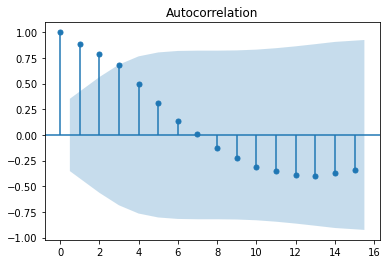

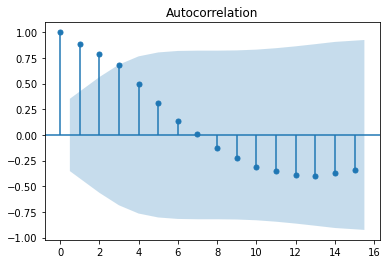

In [27]:
plot_acf(all_data)

In [28]:
#q=2 , p = 2, d = 0

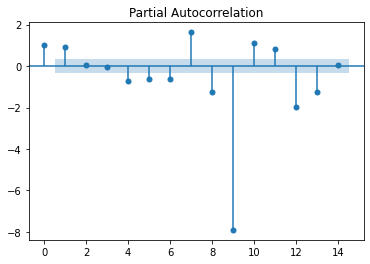

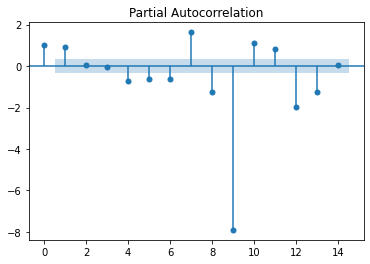

In [29]:
plot_pacf(all_data.values,lags = 14)

In [30]:
#statsmodels.tsa.arima.model.ARIMA 
from statsmodels.tsa.arima.model import ARIMA
power_base.describe()

,Actual_Yield,Forecasted_Yield
count,3.000000e+01,3.000000e+01
mean,6.976413e+06,6.976564e+06
std,5.867968e+04,5.868616e+04
min,6.875446e+06,6.875446e+06
25%,6.930938e+06,6.930938e+06
50%,6.978653e+06,6.980694e+06
75%,7.022009e+06,7.022009e+06
max,7.074979e+06,7.074979e+06


In [31]:
power_train = all_data[0:23]
power_test = all_data[23:]

power_train
power_test


Day
24    6.921214e+06
25    6.929363e+06
26    6.935661e+06
27    6.940299e+06
28    6.952355e+06
29    6.954100e+06
30    6.968307e+06
31    6.976650e+06
Name: TOTAL_YIELD, dtype: float64

In [32]:
power_model = ARIMA(power_train,order=(1,0,2))

c:\users\sunja\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\sunja\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\sunja\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [33]:
power_model_fit = power_model.fit()

In [34]:
# Total Yield forecast for next few days
power_forecast = power_model_fit.forecast(steps=8)


c:\users\sunja\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


### ROOT OF "MEAN SQUARED ERROR" OF "FORECASTED vs ACTUAL YIELD" 

In [35]:
np.sqrt(mean_squared_error(power_test,power_forecast))


5386.772702893597

Text(0, 0.5, 'Yield')

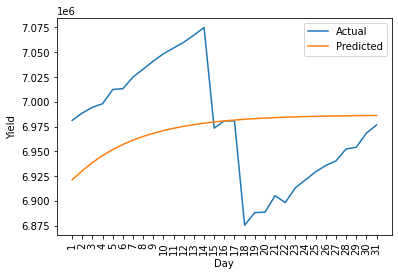

In [41]:
#graph of forecast v/s actual yield
power_forecast = power_model_fit.forecast(steps=31)
day = range(1,32)

plt.plot(day,result['TOTAL_YIELD'],day,power_forecast)
plt.legend(['Actual','Predicted']) 
plt.xticks(day,rotation = 'vertical')
plt.xlabel('Day')
plt.ylabel('Yield')



In [37]:
power_forecast

23    6.921241e+06
24    6.930405e+06
25    6.938683e+06
26    6.945745e+06
27    6.951770e+06
28    6.956911e+06
29    6.961296e+06
30    6.965037e+06
31    6.968228e+06
32    6.970951e+06
33    6.973274e+06
34    6.975256e+06
35    6.976947e+06
36    6.978389e+06
37    6.979619e+06
38    6.980669e+06
39    6.981565e+06
40    6.982329e+06
41    6.982981e+06
42    6.983537e+06
43    6.984011e+06
44    6.984416e+06
45    6.984761e+06
46    6.985056e+06
47    6.985307e+06
48    6.985521e+06
49    6.985704e+06
50    6.985860e+06
51    6.985993e+06
52    6.986107e+06
53    6.986204e+06
Name: predicted_mean, dtype: float64

In [38]:


p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)



In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = all_data[0:23],all_data[23:31]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()
                    predictions.append(pred_y)
                    error = mean_squared_error(test,predictions)
                    print('ARIMA %s, MSE = %.2f'% (order,error))
                except:
                    continue
                